In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
def countcall(X):
    # GT:GB   ------   ./.:0|0

    S = X.dropna().astype(str).copy()
    L = [x.split(':') for x in list(S) if x!='.']
    count_gb = len([x[1] for x in L if x[1]not in ['.','./.']])
    count_gn = len(L)
    return(count_gb)

sample = pd.read_csv('/storage/szfeupe/Runs/650GTEx_estr/Filter_Merged_STRs_All_Samples.vcf.gz', skiprows=132, sep='\t', low_memory=False)
sample.index = list(sample['ID'])
sample = sample[sample.columns[9:]]

In [4]:
# Histogram of the number of calls per sample pre-filtering
COUNT=[]
SMPL=[]
COL = list(sample.columns)
for i in range(len(COL)):
    COUNT.append(countcall(sample[COL[i]]))
    SMPL.append(COL[i])
    if i in [0,100, 200, 300,400, 500, 600, 630]:
        print(i)
print('END')

0
100
200
300
400
500
600
630
END


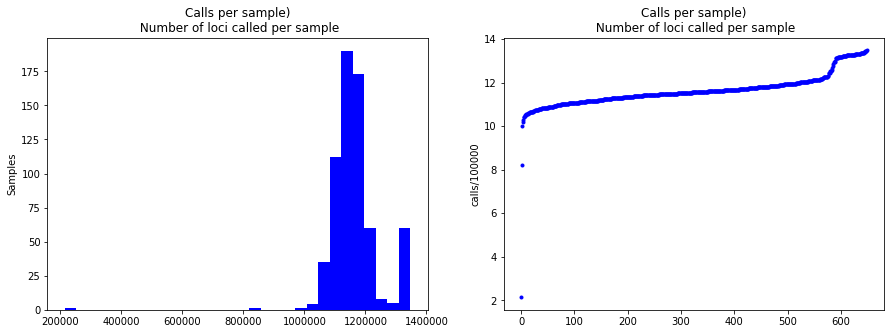

In [13]:
#histogram
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.hist(sorted([i for i in COUNT]),bins=30, color='b')
plt.title('Calls per sample)\n Number of loci called per sample')
plt.ylabel('Samples')

ax2 = fig.add_subplot(122)
ax2.scatter([i for i in range(650)],sorted([i/100000 for i in COUNT]), marker='.', color='b')
plt.title('Calls per sample)\n Number of loci called per sample')
plt.ylabel('calls/100000')
plt.show()

In [24]:
ids = sample.index
ROW = []
for i in range(sample.shape[0]):
    ROW.append(countcall(sample.loc[ids[i]]))

print(len(COUNT), len(SMPL), len(ROW))

650 650 1586494


650 0


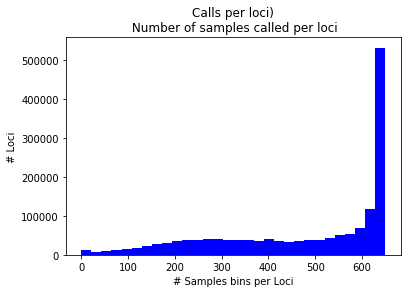

In [28]:
print(max(ROW), min(ROW))
#histogram
plt.hist(ROW, bins=30, color='b')
plt.title('Calls per loci)\n Number of samples called per loci')
plt.ylabel('# Loci')
plt.xlabel('# Samples bins per Loci')
plt.show()


In [ ]:
# Histogram of the number of samples called per locus
sample['calls']=sample.apply(lambda row: countcall(row), axis=1)
sample
